In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../data_processing/')
import matplotlib.cm as cm
from feature import Feature

In [2]:
def plot_feature(feature, indices, sample_size=150000):

    plt.figure(figsize=(15, 5))
    start, stop, step = indices
    data_pcs = [feature.values[i:i + step] for i in range(max(step, start), stop, step)]
    time_pcs = [list(range(i, i + step)) for i in range(max(step, start), stop, step)]

    for i, (data_sample, time_sample) in enumerate(zip(data_pcs, time_pcs)):
        if i%2:
            plt.plot(time_sample, data_sample, 'r')
        else:
            plt.plot(time_sample, data_sample, 'k')
    plt.grid(True)
    plt.show()

In [35]:
df = pd.read_hdf('../../data.nosync/train.h5', key='table')

In [34]:
%%time
r_std10000 = Feature(df['s'], '../../data.nosync/')\
.w_last_elem(window_size=150000, window_stride=1000)\
.dump()\
.r_std(window_size=1000)\
.data

	 Rolling decorator for r_std: 
CPU times: user 26.2 ms, sys: 9.29 ms, total: 35.5 ms
Wall time: 34.5 ms


In [13]:
signal_dec = Feature(df['s'], '../../data.nosync/')\
.w_last_elem(window_size=150000, window_stride=1000)\
.data

w_last_elem(self, window_size=150000, window_stride=1000): 100%|██████████| 628997/628997 [00:51<00:00, 12219.76it/s]
	 window decorator for w_last_elem: 
	 - window size: 150000
	 - window stride: 1000


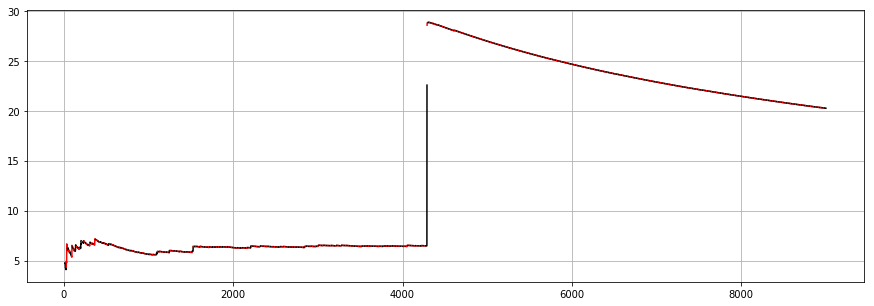

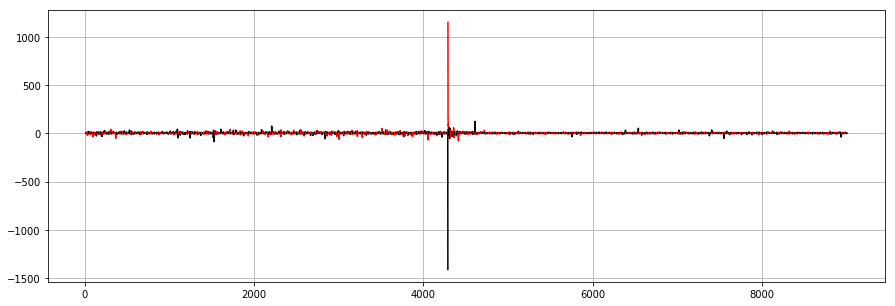

In [25]:
plot_feature(feature=r_std10000, indices=(0, 9000, 15))
plot_feature(feature=signal_dec, indices=(0, 9000, 15))